In [137]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Flatten, Activation, MaxPool2D, AvgPool2D, Conv2D, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

array([[[ 7,  5,  7],
        [ 7,  5,  7],
        [ 7,  5,  7],
        ...,
        [ 5,  4,  7],
        [ 5,  4,  7],
        [ 4,  4,  7]],

       [[ 7,  5,  7],
        [ 7,  5,  7],
        [ 7,  5,  7],
        ...,
        [ 5,  4,  5],
        [ 4,  4,  7],
        [ 4,  4,  7]],

       [[ 7,  5,  7],
        [ 7,  5,  7],
        [ 7,  5,  7],
        ...,
        [ 5,  4,  7],
        [ 5,  4,  5],
        [ 4,  4,  7]],

       ...,

       [[30, 21, 20],
        [30, 21, 19],
        [31, 23, 18],
        ...,
        [35, 28, 29],
        [34, 28, 21],
        [35, 28, 21]],

       [[35, 26, 19],
        [32, 28, 19],
        [32, 28, 24],
        ...,
        [35, 24, 23],
        [34, 24, 24],
        [32, 23, 23]],

       [[36, 32, 23],
        [32, 30, 31],
        [30, 28, 30],
        ...,
        [30, 24, 23],
        [30, 24, 23],
        [30, 24, 24]]], dtype=uint8)

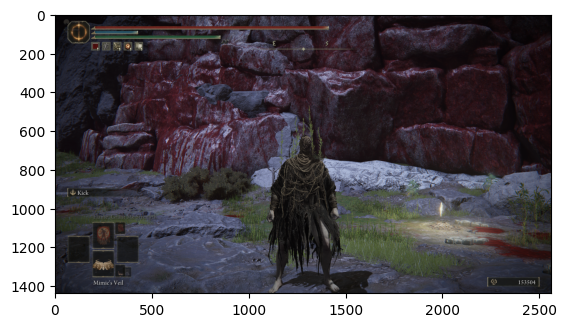

In [138]:
img = image.load_img("testset/bloodlake.png")
plt.imshow(img)

cv2.imread("testset/bloodlake.png")


In [139]:
train = ImageDataGenerator(1/255)
validation = ImageDataGenerator(1/255)


train_dataset = train.flow_from_directory('trainsets/', 
                                          target_size= (400, 400),
                                          batch_size= 5, 
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('ValidationSet/', 
                                          target_size= (400, 400),
                                          batch_size= 5, 
                                          class_mode = 'binary')

train_dataset.class_indices
train_dataset.classes

Found 68 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [140]:
model = Sequential()
model.add(Conv2D(16, (3, 3),activation = 'relu' ,input_shape=(400, 400, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


c:\Users\Ruben Claassen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [141]:
model.compile(loss= 'binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.0001),
              metrics = ['accuracy'])

In [142]:
model_fit = model.fit(train_dataset, 
                      batch_size=5,
                      epochs=8, 
                      validation_data=validation_dataset)


c:\Users\Ruben Claassen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/8


c:\Users\Ruben Claassen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 745ms/step - accuracy: 0.5338 - loss: 221.8888 - val_accuracy: 0.9167 - val_loss: 3.4398
Epoch 2/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 648ms/step - accuracy: 0.7192 - loss: 29.7727 - val_accuracy: 0.5000 - val_loss: 24.9679
Epoch 3/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 680ms/step - accuracy: 0.8380 - loss: 5.6058 - val_accuracy: 0.7500 - val_loss: 8.4369
Epoch 4/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 655ms/step - accuracy: 0.8742 - loss: 10.0779 - val_accuracy: 0.8333 - val_loss: 4.8677
Epoch 5/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 648ms/step - accuracy: 0.8189 - loss: 5.4947 - val_accuracy: 0.7500 - val_loss: 7.0440
Epoch 6/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 641ms/step - accuracy: 0.9856 - loss: 0.4876 - val_accuracy: 0.9167 - val_loss: 6.5850
Epoch 7/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 662ms/step - accuracy: 0.9830 - loss: 0.8614 - val_accuracy: 0.5000 - val_loss: 36.8458
Epoch 8/8
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 679ms/step - accuracy: 0.9358 - loss: 1.6772 - val_accuracy: 0.8333

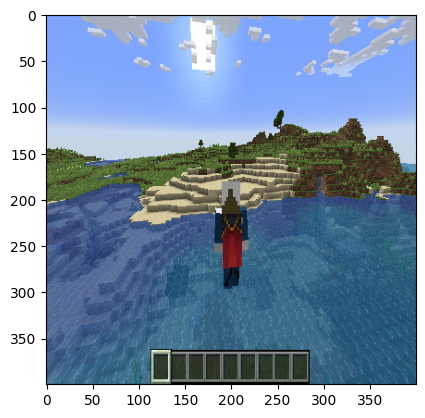

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
it be minecraft


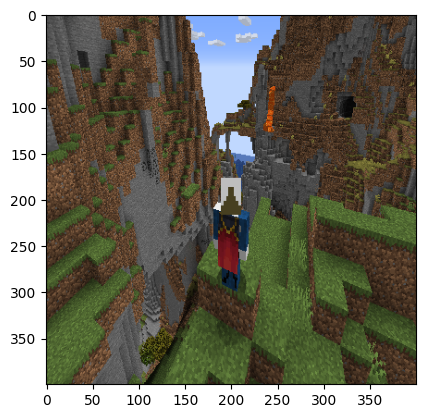

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
it be minecraft


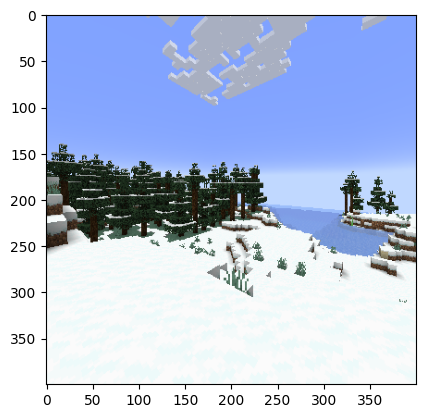

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
it be minecraft


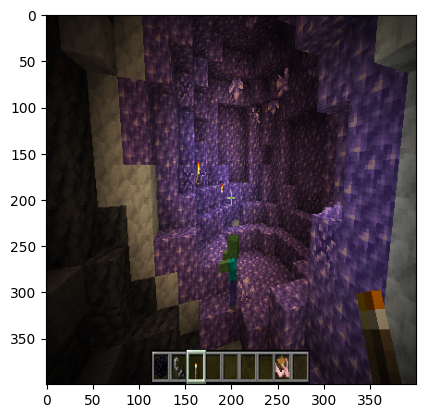

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
it be minecraft


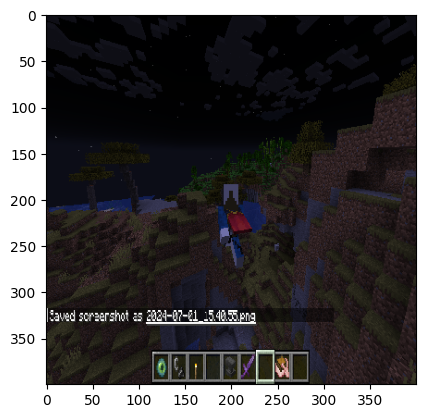

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
it be minecraft


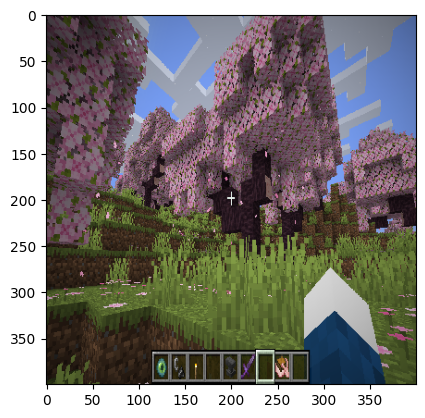

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
it be minecraft


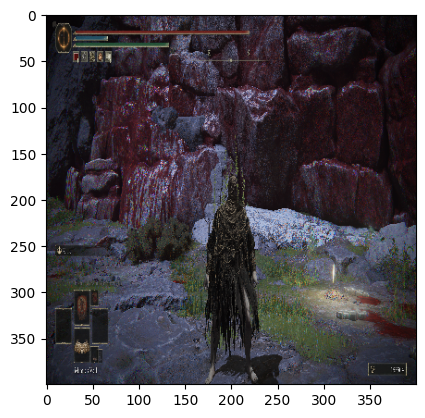

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
it be eldenring


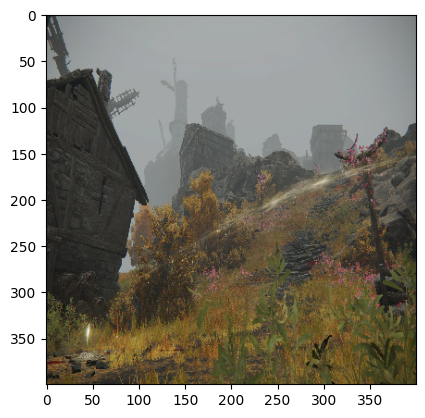

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
it be minecraft


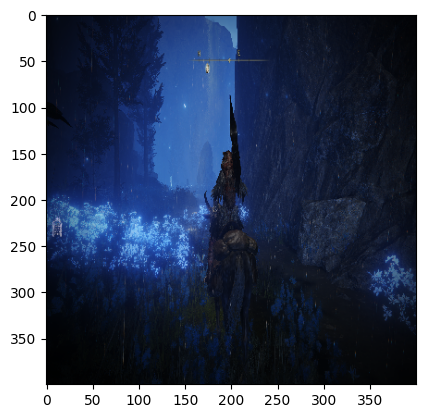

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
it be minecraft


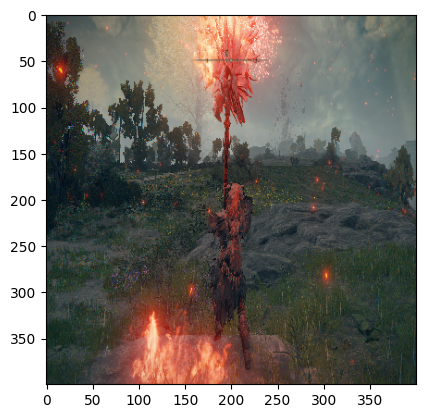

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
it be eldenring


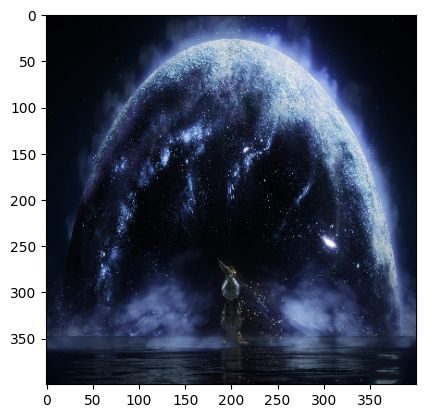

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
it be minecraft


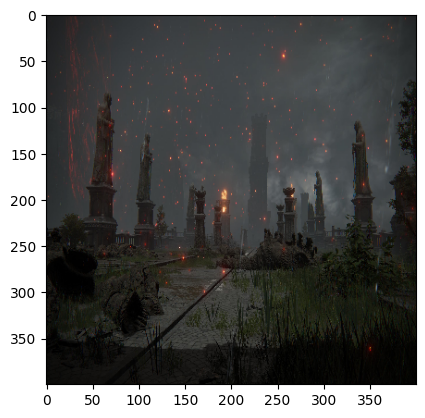

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
it be minecraft


In [143]:
dir_path = "testset/"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + i, target_size=(400, 400))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    value = model.predict(images)
    if(value == 0 ):
        print("it be eldenring")
    else:
        print("it be minecraft")

    

In [144]:
# Predict on the validation data
predictions = model.predict(validation_dataset)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()

# Get true labels
true_classes = validation_dataset.classes
class_labels = list(validation_dataset.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes))
print(cm)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.50      0.50      0.50         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.50      0.50      0.50        12

[[3 3]
 [3 3]]
